In [ ]:
import pandas as pd
df = pd.read_csv('/content/mall.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


* Knee rule or Elbow rule

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
losses = []
for k in range(1,12):
  model1 = KMeans(n_clusters = k)
  model1.fit(df1)
  losses.append(model1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(losses)

[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556197, 75372.45237880023, 58300.44332159069, 51116.986944634315, 44307.87341670446, 41212.15818321463, 37378.420346320345, 34373.33000945415]


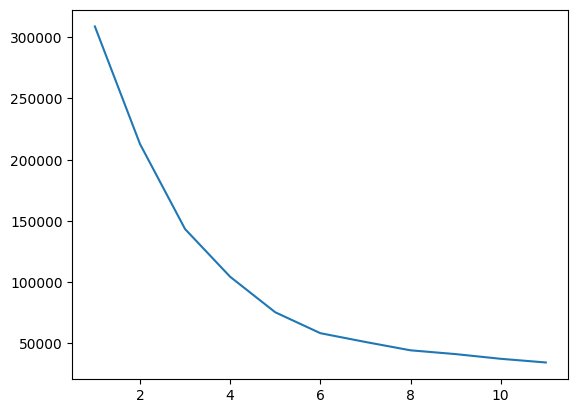

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,12) , losses)
plt.show()

In [ ]:
model2 = KMeans(n_clusters = 6)
model2.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
pd.DataFrame(model2.cluster_centers_,columns = df1.columns)

,Age,Annual Income (k$),Spending Score (1-100)
0,41.685714,88.228571,17.285714
1,56.155556,53.377778,49.088889
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,27.000000,56.657895,49.131579
5,44.142857,25.142857,19.523810


In [ ]:
df1['Label'] = model2.predict(df1)

<ipython-input-13-82c53995eabe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = model2.predict(df1)


In [ ]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,5
1,21,15,81,3
2,20,16,6,5
3,23,16,77,3
4,31,17,40,5


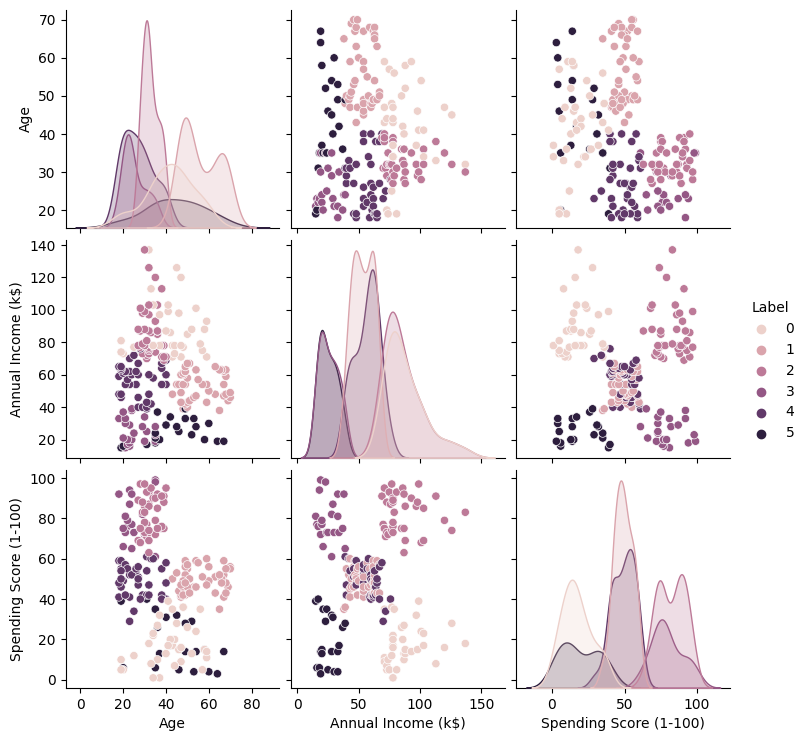

In [ ]:
import seaborn as sns
sns.pairplot(df1 , hue='Label')
plt.show()

**Assignment**

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data